### Fake News Detection Problem

In [46]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [47]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [48]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

In [8]:
pip install dill


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:
import dill
dill.dump_session('notebook_env.db')

In [10]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [11]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [11]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [12]:
df_fake["class"]=0
df_true["class"]=1

In [13]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [14]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23415, 23405, -1):
    df_fake.drop([i], axis=0, inplace= True)
df_true_manual_testing = df_true.tail(10)
for i in range(21406, 21396, -1):
    df_true.drop([i], axis=0, inplace= True)

In [15]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [16]:
df_merge = pd.concat([df_fake, df_true], axis = 0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [17]:
df = df_merge.drop(["title", "subject", "date"], axis = 1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [18]:
df = df.sample(frac=1)
df.head(10)

,text,class
12845,Is CNN contributor and Democratic Strategist B...,0
19721,NBC reports:The FBI is reviewing a new batch o...,0
17429,BERLIN (Reuters) - After a series of setbacks ...,1
15518,Americans need to put American citizens first ...,0
10514,"Some day, when things calm down, I'll tell the...",0
6837,"When I was a kid, I watched a number of fights...",0
15765,More and more dirt on these two grifters who r...,0
17845,Remember the time when a gay couple destroyed ...,0
3050,WASHINGTON (Reuters) - Congressional leaders a...,1
20391,Dolly Kyle has written a scathing tell all b...,0


In [19]:
df.isnull().sum()

text     0
class    0
dtype: int64

### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.


In [20]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [22]:
df["text"] = df["text"].apply(word_drop)

In [23]:
df.head(10)

,text,class
12845,is cnn contributor and democratic strategist b...,0
19721,nbc reports the fbi is reviewing a new batch o...,0
17429,berlin reuters after a series of setbacks ...,1
15518,americans need to put american citizens first ...,0
10514,some day when things calm down i ll tell the...,0
6837,when i was a kid i watched a number of fights...,0
15765,more and more dirt on these two grifters who r...,0
17845,remember the time when a gay couple destroyed ...,0
3050,washington reuters congressional leaders a...,1
20391,dolly kyle has written a scathing tell all b...,0


### Defining dependent and independent variable as x and y

In [24]:
x = df["text"]
y = df["class"]

### Splitting the dataset into training set and testing set.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Convert text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [30]:
LR.score(xv_test, y_test)

0.9861853832442068

In [31]:
pred_LR = LR.predict(xv_test)

In [32]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5891
           1       0.98      0.99      0.99      5329

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 2. Decision Tree Classification

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [35]:
DT.score(xv_test, y_test)

0.9950980392156863

In [36]:
pred_dt = DT.predict(xv_test)

In [37]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5891
           1       1.00      0.99      0.99      5329

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### 3. Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [51]:
GBC.score(xv_test, y_test)

0.9952762923351158

In [52]:
pred_GBC = GBC.predict(xv_test)

In [53]:
print(classification_report(y_test, pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5891
           1       0.99      1.00      1.00      5329

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [55]:
{}
####4. Random Forest Classifier

{}

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [58]:
RFC.score(xv_test, y_test)

0.9874331550802139

In [59]:
pred_RFC = RFC.predict(xv_test)

In [60]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5891
           1       0.99      0.98      0.99      5329

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [61]:
##Manual Testing

In [64]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "True News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction:() \nDT Prediction:() \nGBC Prediction:() \nRFC Prediction:()".format(output_lable(pred_LR),output_lable(pred_DT), output_lable(pred_GBC),output_lable(pred_RFC)))

In [65]:
news = str(input())
manual_testing(news)



LR Prediction:() 
DT Prediction:() 
GBC Prediction:() 
RFC Prediction:()


In [88]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [89]:
pip install seaborn


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



In [90]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [91]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25,
                                                    random_state=1234)

In [92]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score


In [93]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GradientBoostingClassifier(random_state=1234),
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

In [94]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [95]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

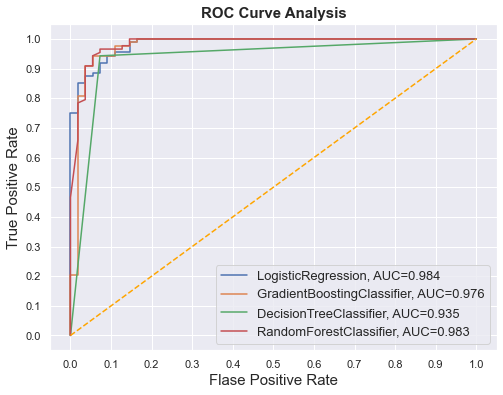

In [96]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()